# Machine Learning project
## Dr.Shamshollahi
## Roja Atashkar 400100543

### 1 Loading the dataset
help : https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
Creating a dataframe to implement one hot encoding from CSV file.

In [2]:
# import libraries
import numpy as np
import pandas as pd

# import the data required
df = pd.read_csv('train.csv')
print(df.shape)
print(df.head())

(810, 12)
   Age Sex ChestPain  RestingBloodPressure  Cholesterol  FastingBS RestingECG  \
0   59   M       ASY                   130          126          0     Normal   
1   46   M       ASY                   110          238          0         ST   
2   56   F       ATA                   140          294          0        LVH   
3   66   F       NAP                   146          278          0        LVH   
4   61   M       ASY                   134            0          1         ST   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  Disease  
0    125              N      0.0     Flat        1  
1    140              Y      1.0     Flat        0  
2    153              N      1.3     Flat        0  
3    152              N      0.0     Flat        0  
4     86              N      1.5     Flat        1  


we can use the unique() function from the pandas library to get unique elements from the column of the dataframe.

In [3]:
print(df['ChestPain'].unique())
print(df['Sex'].unique())
print(df['RestingECG'].unique())
print(df['ExerciseAngina'].unique())
print(df['ST_Slope'].unique())

['ASY' 'ATA' 'NAP' 'TA']
['M' 'F']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Flat' 'Down' 'Up']


We can use value_counts() function from pandas to get the counts of each element in the dataframe

In [4]:
print(df['ChestPain'].value_counts())
print(df['Sex'].value_counts())
print(df['RestingECG'].value_counts())
print(df['ExerciseAngina'].value_counts())
print(df['ST_Slope'].value_counts())

ASY    447
NAP    170
ATA    154
TA      39
Name: ChestPain, dtype: int64
M    638
F    172
Name: Sex, dtype: int64
Normal    483
LVH       168
ST        159
Name: RestingECG, dtype: int64
N    480
Y    330
Name: ExerciseAngina, dtype: int64
Flat    405
Up      350
Down     55
Name: ST_Slope, dtype: int64


One-Hot Encoding of Categorical Column Using Pandas library
We can use pd.get_dummies() function from pandas to one-hot encode the categorical columns.

In [6]:
# one hot encoding
df = pd.get_dummies(df, columns = ['ChestPain', 'Sex', 'RestingECG', 'ExerciseAngina','ST_Slope' ])
print(df)

     Age  RestingBloodPressure  Cholesterol  FastingBS  MaxHR  Oldpeak  \
0     59                   130          126          0    125      0.0   
1     46                   110          238          0    140      1.0   
2     56                   140          294          0    153      1.3   
3     66                   146          278          0    152      0.0   
4     61                   134            0          1     86      1.5   
..   ...                   ...          ...        ...    ...      ...   
805   60                   120          178          1     96      0.0   
806   54                   125          224          0    122      2.0   
807   44                   112          290          0    153      0.0   
808   39                   110          280          0    150      0.0   
809   48                   110          229          0    168      1.0   

     Disease  ChestPain_ASY  ChestPain_ATA  ChestPain_NAP  ...  Sex_F  Sex_M  \
0          1              1    

### 2 Processing and Plotting
plotting the histogram of all features:

C:\Users\MehrSystem\AppData\Local\Temp\ipykernel_8536\3496436815.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


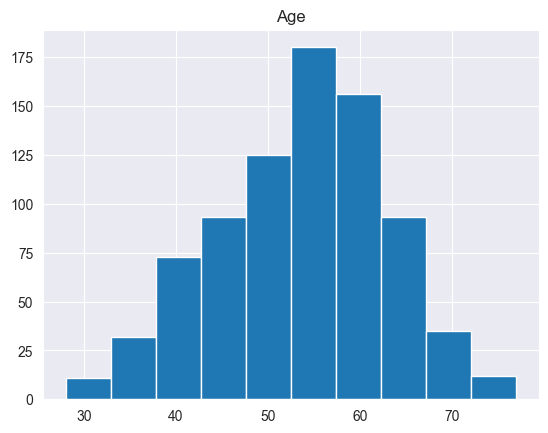

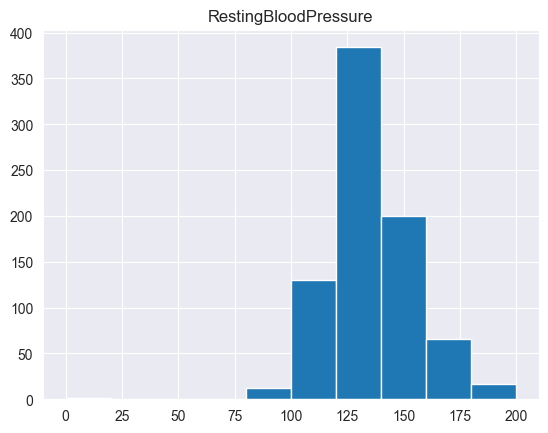

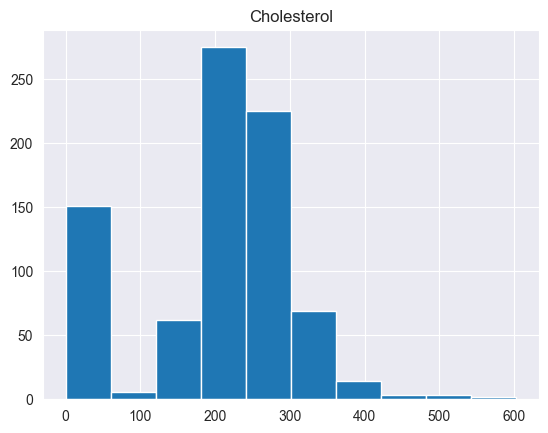

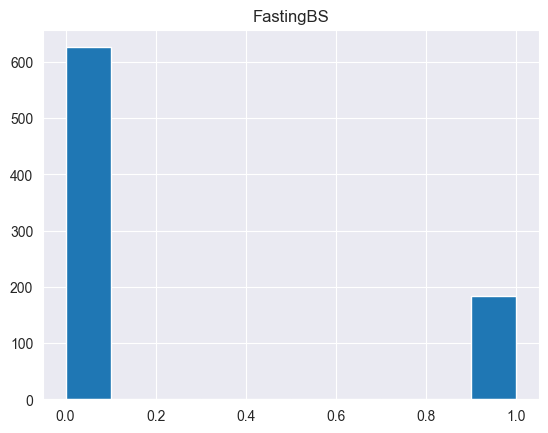

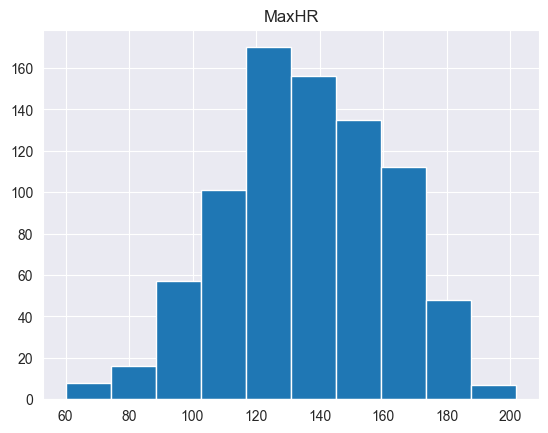

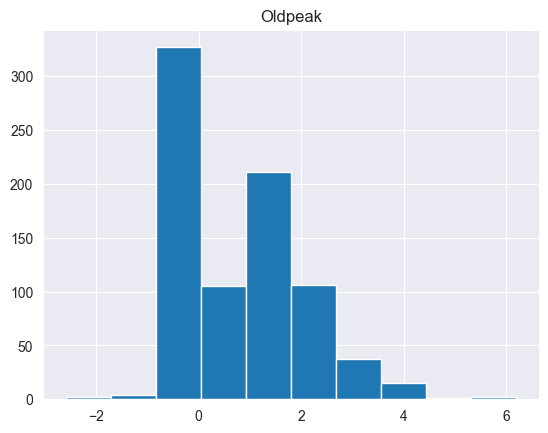

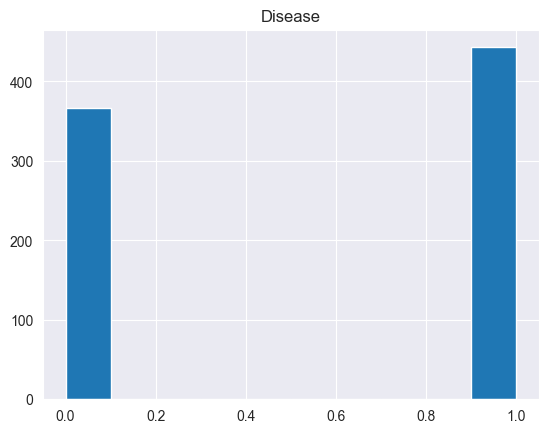

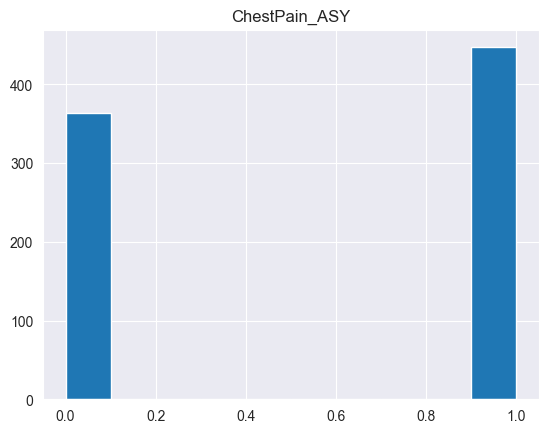

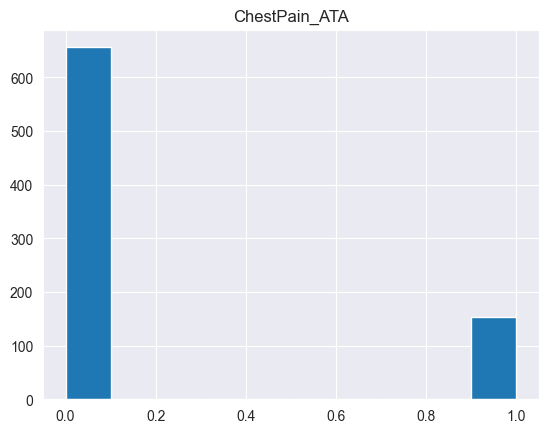

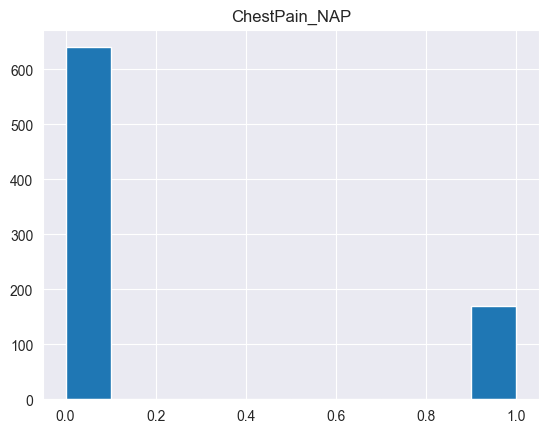

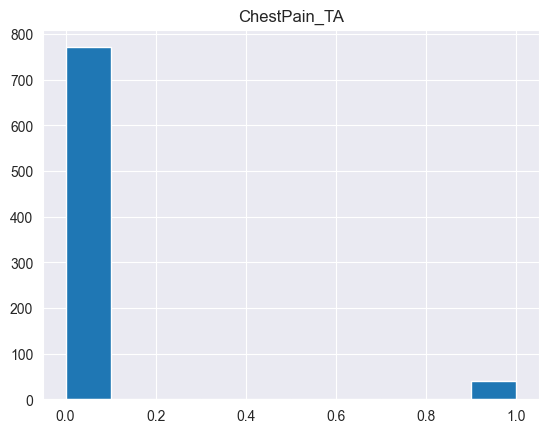

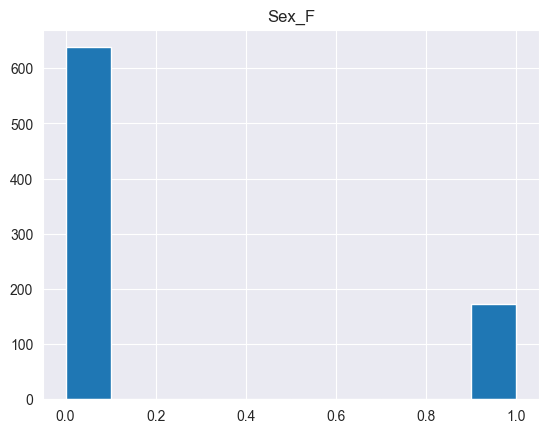

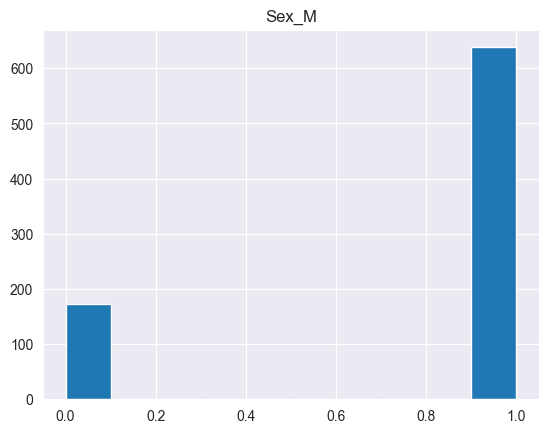

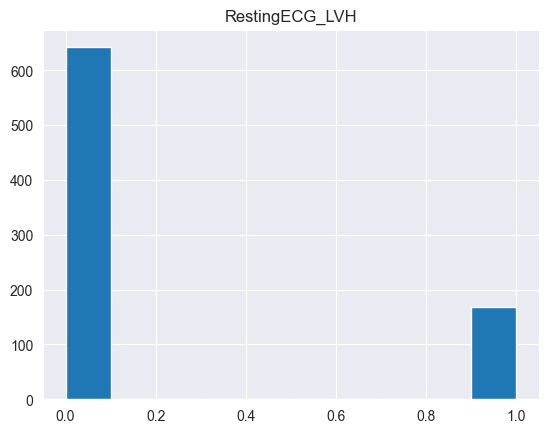

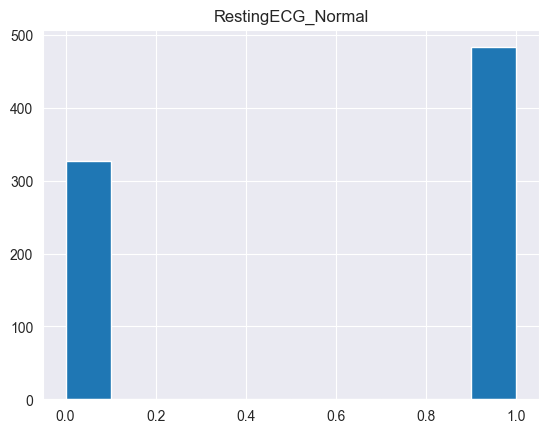

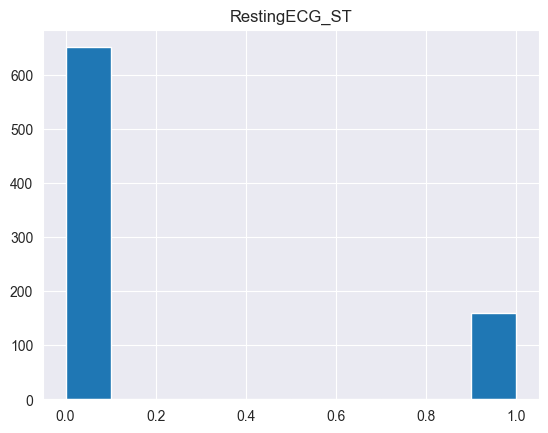

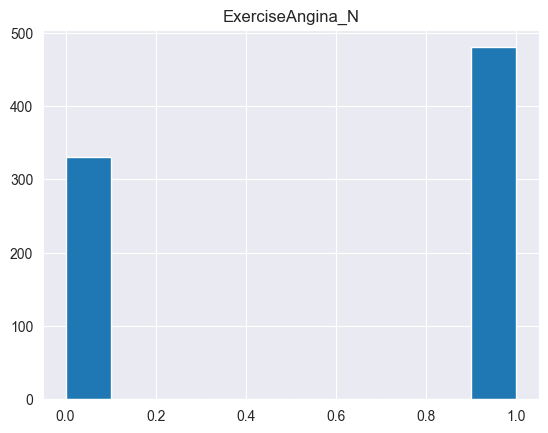

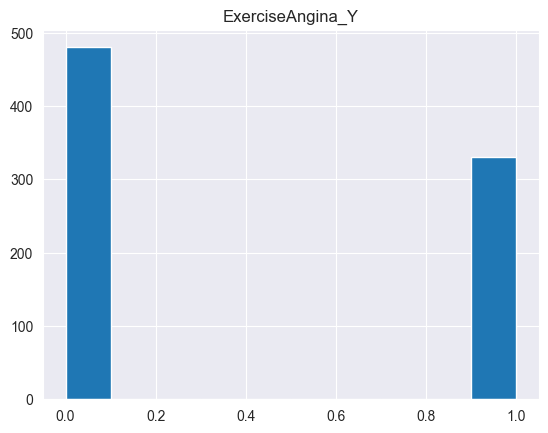

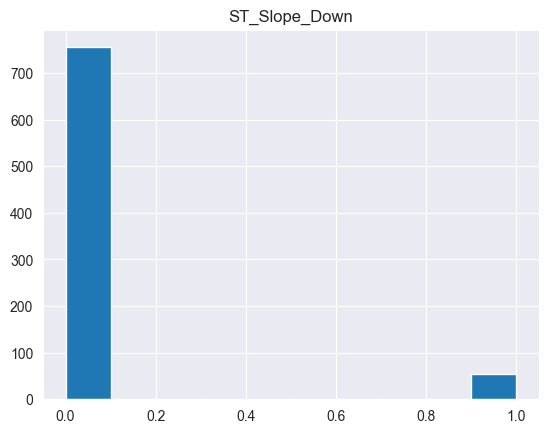

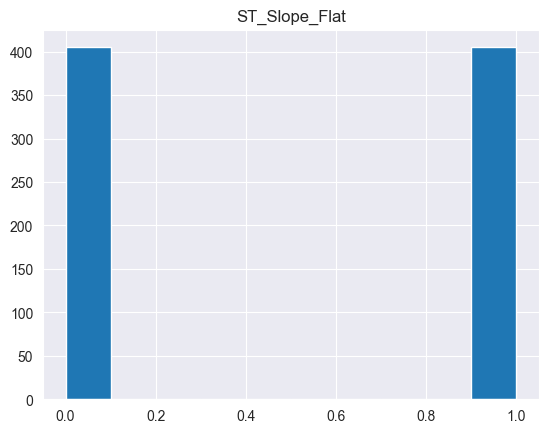

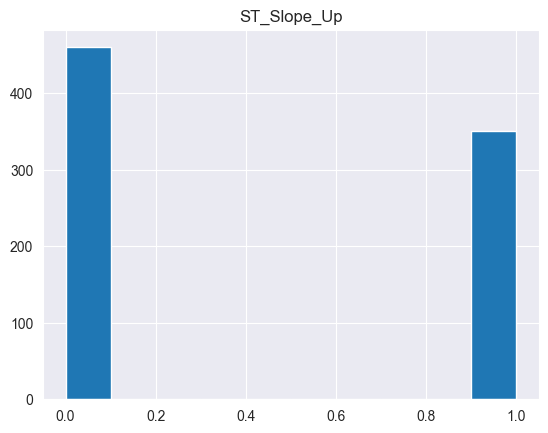

In [7]:

from matplotlib import pyplot as plt

for i in df.columns:

    plt.figure()
    plt.title(f'{i}')
    plt.hist(df[i])

Choosing two random features and plot the data for two classes.

In [8]:
y = df['Disease']
X = df.drop('Disease', axis=1)

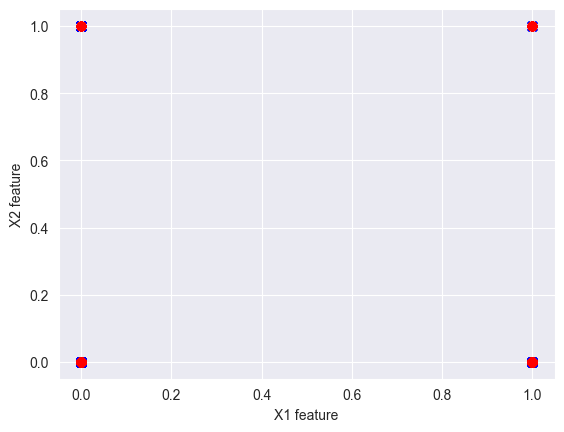

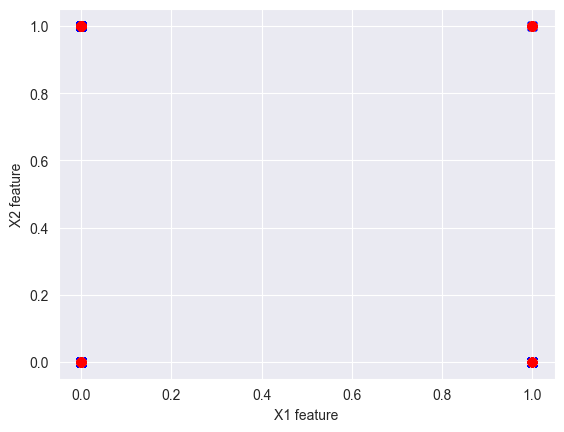

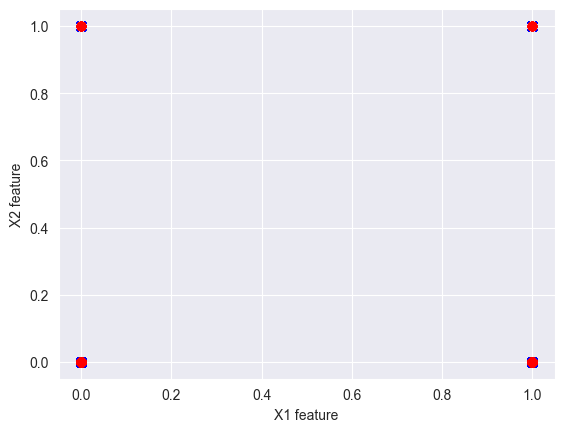

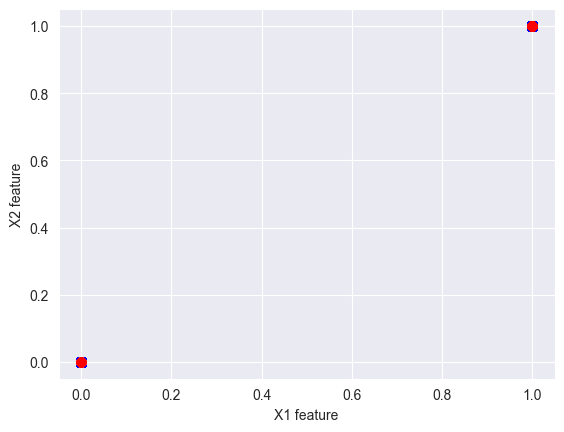

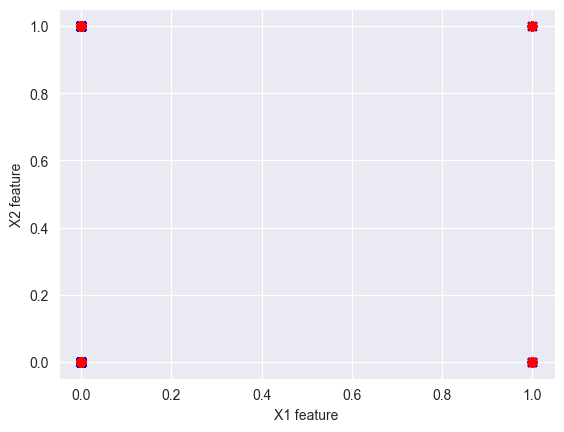

In [9]:
import random
import random

n= df.shape[1]


for i in range(5):

    a = random.randrange(n-1)
    b = random.randrange(n-1)
    mask = (y == 0)
    plt.scatter(X.iloc[:,a][mask],X.iloc[:,b][mask], color='blue', marker='x', label='Class y = 0')
    mask = (y == 1)
    plt.scatter(X.iloc[:,a][mask],X.iloc[:,b][mask], color='red', marker='o', label='Class y = 1')
    plt.xlabel('X1 feature')
    plt.ylabel('X2 feature')

    plt.show()

help : https://www.analyticsvidhya.com/blog/2021/06/feature-selection-using-statistical-tests/
Checking the independence between two random chosen features:
we will use Correlation Test to do so.
A correlation test is a metric to evaluate the extent to which variables are associated with one another.
There are several methods for correlation tests i.e. Covariance, Pearson correlation coefficient, Spearman rank correlation coefficient, etc.
We will use the person correlation coefficient since it is independent of the values of variables.
Pearson Correlation Coefficient
It is used to measure the linear correlation between 2 variables.
Implementation:
Here we will be using two continuous variables or features – Loan Amount and Applicant Income. We will conclude whether there is a linear relation between Loan Amount and Applicant Income with the Pearson correlation Coefficient value and also draw the chart between them.


[[1.         0.05193657]
 [0.05193657 1.        ]]
[[ 1.         -0.39196475]
 [-0.39196475  1.        ]]
[[ 1.         -0.23227493]
 [-0.23227493  1.        ]]
[[1.         0.20499662]
 [0.20499662 1.        ]]
[[1.         0.18670299]
 [0.18670299 1.        ]]


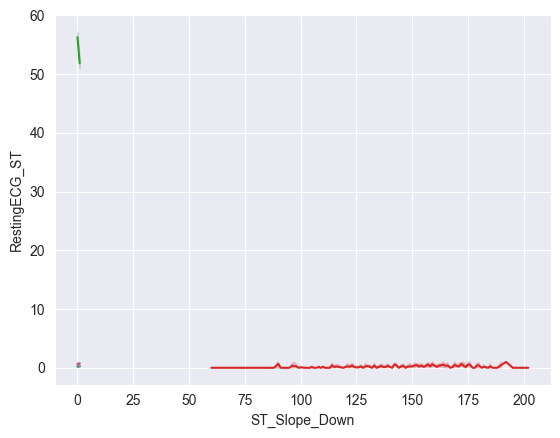

In [10]:
import seaborn as sns
for i in range(5):

    a = random.randrange(n-1)
    b = random.randrange(n-1)
    pcc = np.corrcoef(X.iloc[:,a], X.iloc[:,b])
    print(pcc)
    sns.lineplot(data=df, x=X.columns[a], y=X.columns[b])

he values on the diagonals indicate the correlation of features with themselves.

### 3 Splitting the dataset
know, we split the dataset into train and test dataset br 70 / 30.We will do this for five times.

In [11]:
from sklearn.model_selection import train_test_split

#  split on train and test 0.7/0.3
X_train = []
X_test = []
y_train = []
y_test = []
for i in range(5):
    X_train.append([])
    X_test.append([])
    y_train.append([])
    y_test.append([])

# set features and target
X, y = df.iloc[:, :-1], df.iloc[:, -1]
for i in range(5):
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y)
    print(X_train[i].shape, y_train[i].shape)
    print(X_test[i].shape, y_test[i].shape)


(648, 20) (648,)
(162, 20) (162,)
(648, 20) (648,)
(162, 20) (162,)
(648, 20) (648,)
(162, 20) (162,)
(648, 20) (648,)
(162, 20) (162,)
(648, 20) (648,)
(162, 20) (162,)


### 4 Naive Bayes Classifier

we will use GaussianNB from sklearn.naive_bayes to implement Naive bayes.Also, we evaluate the model with Accuracy , F1 score , Recall score and precision score.At the end we plot the confusion matrix.

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
from sklearn.metrics import recall_score, precision_score


gnb  = GaussianNB()

Accuracy_train_gnb = []
Accuracy_test_gnb = []
F1_score_gnb = []
Recall_score_gnb = []
Precision_score_gnb = []

y_pred_gnb = []

for i in range(5):
    gnb.fit(X_train[i],y_train[i])
    y_pred_gnb.append(gnb.predict(X_test[i]))

    print("training dataset ", i)
    print("Accuracy Score on test data : {:.2f}%".format(accuracy_score(y_test[i],y_pred_gnb[i])*100))
    print("Accuracy Score on train data: {:.2f}%".format(accuracy_score(y_train[i],gnb.predict(X_train[i]))*100))
    print("F1 Score: ",f1_score(y_test[i],y_pred_gnb[i]))
    print("Recall Score: ", recall_score(y_test[i], y_pred_gnb[i]))
    print("Precision Score: ", precision_score(y_test[i], y_pred_gnb[i]))
    Accuracy_test_gnb.append(accuracy_score(y_test[i],y_pred_gnb[i])*100)
    Accuracy_train_gnb.append(accuracy_score(y_train[i],gnb.predict(X_train[i]))*100)
    F1_score_gnb.append(f1_score(y_test[i],y_pred_gnb[i]))
    Recall_score_gnb.append(recall_score(y_test[i], y_pred_gnb[i]))
    Precision_score_gnb.append(precision_score(y_test[i], y_pred_gnb[i]))




training dataset  0
Accuracy Score on test data : 98.77%
Accuracy Score on train data: 98.92%
F1 Score:  0.9855072463768115
Recall Score:  0.9714285714285714
Precision Score:  1.0
training dataset  1
Accuracy Score on test data : 99.38%
Accuracy Score on train data: 98.61%
F1 Score:  0.9928057553956835
Recall Score:  0.9857142857142858
Precision Score:  1.0
training dataset  2
Accuracy Score on test data : 96.91%
Accuracy Score on train data: 98.30%
F1 Score:  0.962962962962963
Recall Score:  0.9285714285714286
Precision Score:  1.0
training dataset  3
Accuracy Score on test data : 99.38%
Accuracy Score on train data: 98.46%
F1 Score:  0.9928057553956835
Recall Score:  0.9857142857142858
Precision Score:  1.0
training dataset  4
Accuracy Score on test data : 97.53%
Accuracy Score on train data: 98.92%
F1 Score:  0.9705882352941176
Recall Score:  0.9428571428571428
Precision Score:  1.0


In [58]:
# mean scores on 5 training sets
print("Mean Accuracy Score on test data :", np.average(Accuracy_test_gnb))
print("Mean Accuracy Score on train data: ", np.average(Accuracy_train_gnb))
print("Mean F1 Score: ",np.average(F1_score_gnb))
print("Mean Recall Score: ", np.average(Recall_score_gnb))
print("Mean Precision Score: ", np.average(Precision_score_gnb))

# std of scores
print("std of Accuracy Score on test data :", np.std(Accuracy_test_gnb))
print("std of Accuracy Score on train data: ", np.std(Accuracy_train_gnb))
print("std of F1 Score: ",np.std(F1_score_gnb))
print("std of Recall Score: ", np.std(Recall_score_gnb))
print("std of Precision Score: ", np.std(Precision_score_gnb))

Mean Accuracy Score on test data : 98.39506172839506
Mean Accuracy Score on train data:  98.64197530864197
Mean F1 Score:  0.9809339910850519
Mean Recall Score:  0.962857142857143
Mean Precision Score:  1.0
std of Accuracy Score on test data : 1.0029677042760412
std of Accuracy Score on train data:  0.24691358024690938
std of F1 Score:  0.01210607082672606
std of Recall Score:  0.023211538298959902
std of Precision Score:  0.0


So, for Bayesian classifier we have:
Mean Accuracy Score on test data : 98.39506172839506
Mean Accuracy Score on train data:  99.10493827160492
Mean F1 Score:  0.9810211233257313
Mean Recall Score:  0.962857142857143
Mean Precision Score:  1.0

Plotting the confusion matrix for each of the training sets.

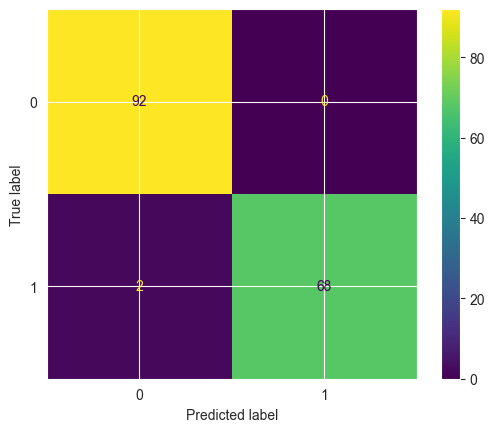

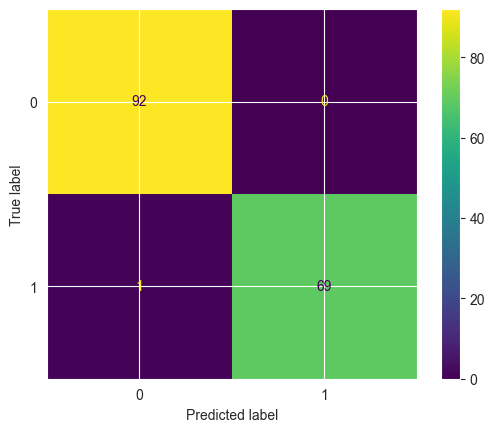

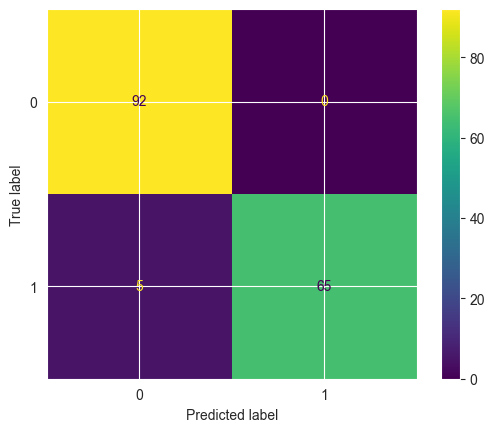

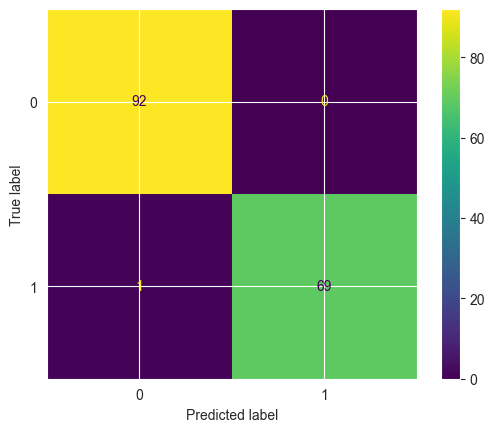

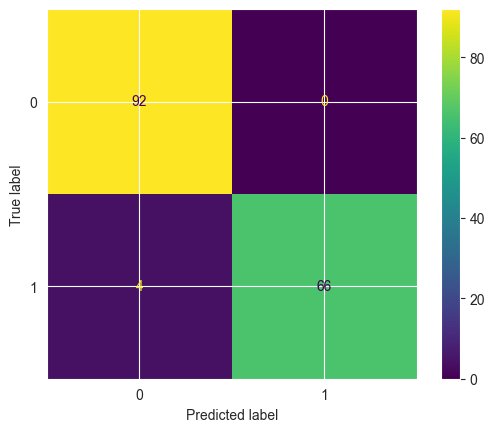

In [14]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
for i in range(5):
    confusion_mtx_gnb = confusion_matrix(y_test[i], y_pred_gnb[i], labels=gnb.classes_)
    disp_gnb = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx_gnb, display_labels=gnb.classes_)
    disp_gnb.plot()
    plt.show()

### 5 SVM classifier

We will use SVC from sklean to implement svm.
Training the model:
Tuning the hyperparameters:
help:https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/



Train the Support Vector Classifier without Hyper-parameter Tuning :
First, we will train our model by calling the standard SVC() function without doing Hyperparameter Tuning and see its classification and confusion matrix.


In [15]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

svc= SVC()


# print prediction results
for i in range(5):
    svc.fit(X_train[i],y_train[i])
    predictions = svc.predict(X_test[i])
    print(classification_report(y_test[i], predictions))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74        92
           1       0.66      0.67      0.67        70

    accuracy                           0.71       162
   macro avg       0.70      0.71      0.70       162
weighted avg       0.71      0.71      0.71       162

              precision    recall  f1-score   support

           0       0.67      0.79      0.73        92
           1       0.64      0.49      0.55        70

    accuracy                           0.66       162
   macro avg       0.66      0.64      0.64       162
weighted avg       0.66      0.66      0.65       162

              precision    recall  f1-score   support

           0       0.67      0.77      0.72        92
           1       0.62      0.50      0.56        70

    accuracy                           0.65       162
   macro avg       0.65      0.64      0.64       162
weighted avg       0.65      0.65      0.65       162

              preci

Use GridsearchCV for hyperparameter tuning:
What fit does is a bit more involved than usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to build a single new model using the best parameter setting.
You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

In [16]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

svm_param = []
svm_estimator = []
# fitting the model for grid search
for i in range(5):
    grid.fit(X_train[i], y_train[i])
    svm_param.append(grid.best_params_)
    svm_estimator.append(grid.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.566 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.566 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.569 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.569 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.569 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.566 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.566 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.569 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [17]:
for i in range(5):
    print("training set ", i)
    print("best param : ", svm_param[i])
    print("best estimator : ", svm_estimator[i])

training set  0
best param :  {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
best estimator :  SVC(C=1000, gamma=0.0001)
training set  1
best param :  {'C': 10000, 'gamma': 0.0001, 'kernel': 'rbf'}
best estimator :  SVC(C=10000, gamma=0.0001)
training set  2
best param :  {'C': 10000, 'gamma': 0.0001, 'kernel': 'rbf'}
best estimator :  SVC(C=10000, gamma=0.0001)
training set  3
best param :  {'C': 10000, 'gamma': 0.0001, 'kernel': 'rbf'}
best estimator :  SVC(C=10000, gamma=0.0001)
training set  4
best param :  {'C': 10000, 'gamma': 0.0001, 'kernel': 'rbf'}
best estimator :  SVC(C=10000, gamma=0.0001)


So, we go with C = 10000, gamma = 0.0001, kernel = 'rbf'.

In [50]:
Accuracy_train_svm= []
Accuracy_test_svm = []
F1_score_svm = []
Recall_score_svm = []
Precision_score_svm =[]

y_pred_svm = []

# print prediction results
for i in range(5):
    svc= SVC(C=10000, gamma=0.0001,  kernel='rbf')
    svc.fit(X_train[i],y_train[i])
    y_pred_svm.append(svc.predict(X_test[i]))
    print(classification_report(y_test[i], y_pred_svm[i]))
    Accuracy_test_svm.append(accuracy_score(y_test[i],y_pred_svm[i])*100)
    Accuracy_train_svm.append(accuracy_score(y_train[i],svc.predict(X_train[i]))*100)
    F1_score_svm.append(f1_score(y_test[i],y_pred_svm[i]))
    Recall_score_svm.append(recall_score(y_test[i], y_pred_svm[i]))
    Precision_score_svm.append(precision_score(y_test[i], y_pred_svm[i]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        70

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        92
           1       0.99      1.00      0.99        70

    accuracy                           0.99       162
   macro avg       0.99      0.99      0.99       162
weighted avg       0.99      0.99      0.99       162

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        92
           1       0.99      0.96      0.97        70

    accuracy                           0.98       162
   macro avg       0.98      0.97      0.97       162
weighted avg       0.98      0.98      0.98       162

              preci

In [52]:
print("Mean Accuracy Score on test data :", np.average(Accuracy_test_svm))
print("Mean Accuracy Score on train data: ", np.average(Accuracy_train_svm))
print("Mean F1 Score: ",np.average(F1_score_svm))
print("Mean Recall Score: ", np.average(Recall_score_svm))
print("Mean Precision Score: ", np.average(Precision_score_svm))


print("std of Accuracy Score on test data :", np.std(Accuracy_test_svm))
print("std of Accuracy Score on train data: ", np.std(Accuracy_train_svm))
print("std of F1 Score: ",np.std(F1_score_svm))
print("std of Recall Score: ", np.std(Recall_score_svm))
print("std of Precision Score: ", np.std(Precision_score_svm))

Mean Accuracy Score on test data : 99.01234567901234
Mean Accuracy Score on train data:  100.0
Mean F1 Score:  0.9884048967906169
Mean Recall Score:  0.9828571428571429
Mean Precision Score:  0.9942419221209612
std of Accuracy Score on test data : 1.0029677042760443
std of Accuracy Score on train data:  0.0
std of F1 Score:  0.011813051352256182
std of Recall Score:  0.020995626366712934
std of Precision Score:  0.007054913324718408


So, for svm classifier we have :
Mean Accuracy Score on test data : 98.14814814814812
Mean Accuracy Score on train data:  100.0
Mean F1 Score:  0.9785332381508314
Mean Recall Score:  0.9742857142857144
Mean Precision Score:  0.9833920877399137

Plotting the confusion matrix for each of the training sets.

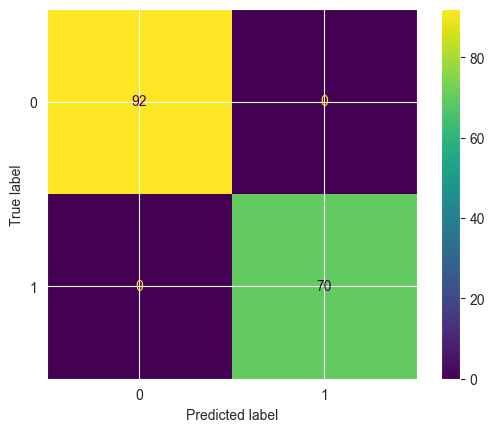

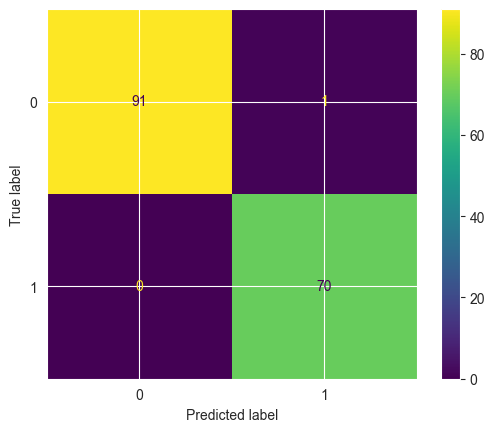

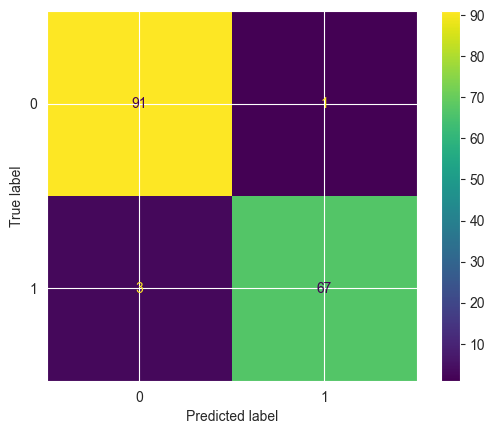

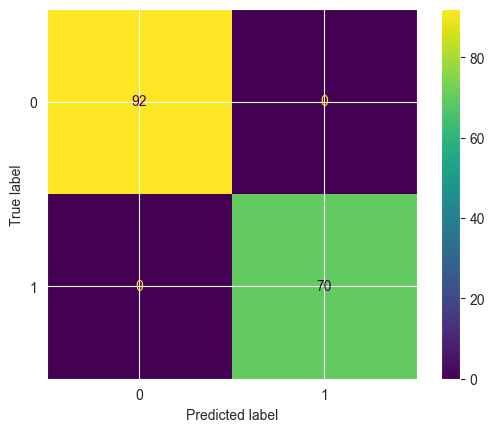

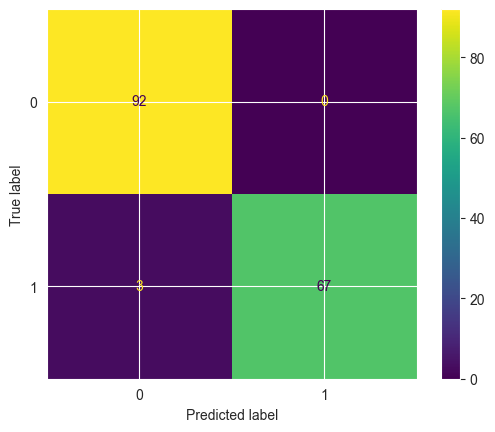

In [20]:
for i in range(5):
    confusion_mtx_svm = confusion_matrix(y_test[i], y_pred_svm[i], labels=gnb.classes_)
    disp_svm = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx_svm, display_labels=gnb.classes_)
    disp_svm.plot()
    plt.show()

### MLP
we will use sklearn.neural_network.MLPClassifier to do so.
How to tune hyperparameters in scikit learn
In scikit learn, there is GridSearchCV method which easily finds the optimum hyperparameters among the given values.
help : https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b

In [21]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=10000)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(10, 20, 20), (20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant','adaptive'],
}

mlp_param = []
mlp_estimator = []
for i in range(5) :
    grid = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
    grid.fit(X_train[i], y_train[i])
    mlp_param.append(grid.best_params_)
    mlp_estimator.append(grid.best_estimator_)

In [22]:
for i in range(5):
    print("training set ", i)
    print("best param : ", mlp_param[i])
    print("best estimator : ", mlp_estimator[i])


training set  0
best param :  {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
best estimator :  MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(20,),
              max_iter=10000)
training set  1
best param :  {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}
best estimator :  MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(20,),
              learning_rate='adaptive', max_iter=10000)
training set  2
best param :  {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}
best estimator :  MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(20,),
              learning_rate='adaptive', max_iter=10000)
training set  3
best param :  {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
best est

So, we go with activation = 'tanh', alpha =0.00001, hidden_layer_size = (20,), learning_rate = constant, solver = adam.

In [53]:

Accuracy_train_mlp= []
Accuracy_test_mlp = []
F1_score_mlp = []
Recall_score_mlp = []
Precision_score_mlp =[]

y_pred_mlp = []

# print prediction results
for i in range(5):
    mlp = MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(20,), learning_rate='constant', solver='adam', max_iter=10000)
    mlp.fit(X_train[i],y_train[i])
    y_pred_mlp.append(mlp.predict(X_test[i]))
    print(classification_report(y_test[i], y_pred_mlp[i]))
    Accuracy_test_mlp.append(accuracy_score(y_test[i],y_pred_mlp[i])*100)
    Accuracy_train_mlp.append(accuracy_score(y_train[i],mlp.predict(X_train[i]))*100)
    F1_score_mlp.append(f1_score(y_test[i],y_pred_mlp[i]))
    Recall_score_mlp.append(recall_score(y_test[i], y_pred_mlp[i]))
    Precision_score_mlp.append(precision_score(y_test[i], y_pred_mlp[i]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        70

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        70

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        70

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162

              preci

In [55]:
print("Mean Accuracy Score on test data :", np.average(Accuracy_test_mlp))
print("Mean Accuracy Score on train data: ", np.average(Accuracy_train_mlp))
print("Mean F1 Score: ",np.average(F1_score_mlp))
print("Mean Recall Score: ", np.average(Recall_score_mlp))
print("Mean Precision Score: ", np.average(Precision_score_mlp))
print("std Accuracy Score on test data :", np.std(Accuracy_test_mlp))
print("std Accuracy Score on train data: ", np.std(Accuracy_train_mlp))
print("std F1 Score: ",np.std(F1_score_mlp))
print("std Recall Score: ", np.std(Recall_score_mlp))
print("std Precision Score: ", np.std(Precision_score_mlp))

Mean Accuracy Score on test data : 100.0
Mean Accuracy Score on train data:  100.0
Mean F1 Score:  1.0
Mean Recall Score:  1.0
Mean Precision Score:  1.0
std Accuracy Score on test data : 0.0
std Accuracy Score on train data:  0.0
std F1 Score:  0.0
std Recall Score:  0.0
std Precision Score:  0.0


plotting the decision matrix for each of the training sets.

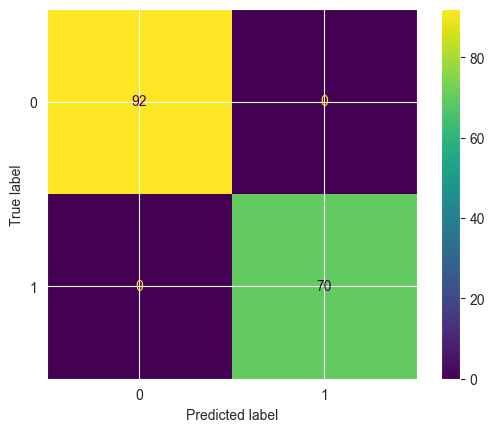

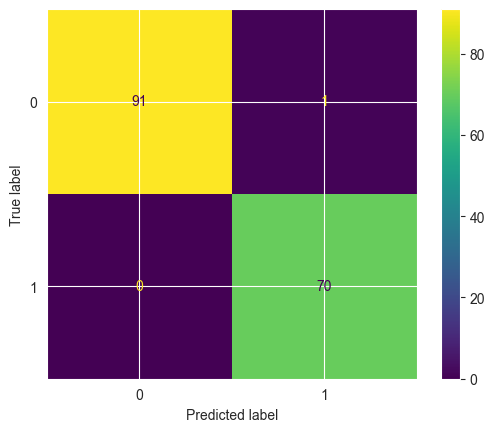

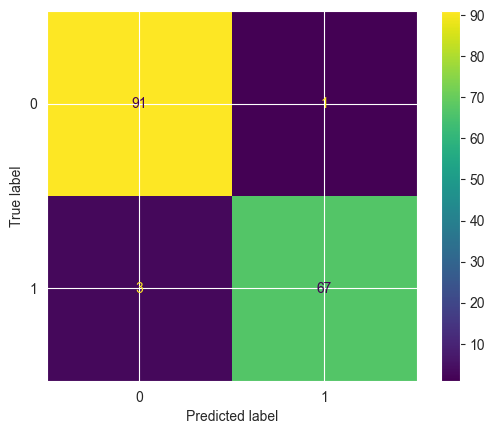

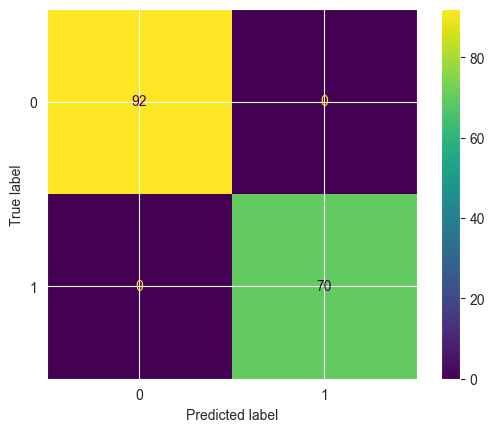

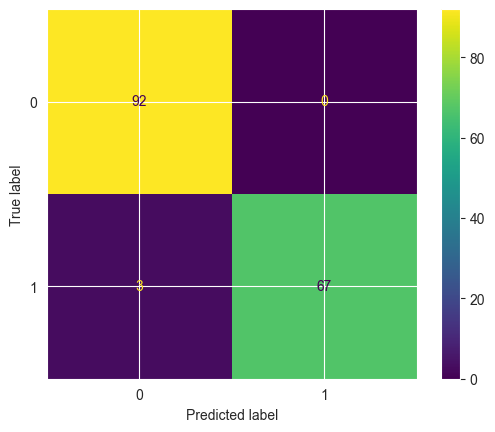

In [47]:
for i in range(5):
    confusion_mtx_svm = confusion_matrix(y_test[i], y_pred_svm[i], labels=gnb.classes_)
    disp_svm = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx_svm, display_labels=gnb.classes_)
    disp_svm.plot()
    plt.show()

### Comparing classifiers

for Naive Bayes we have:
Mean Accuracy Score on test data : 99.01234567901234
Mean Accuracy Score on train data:  98.2716049382716
Mean F1 Score:  0.9793861746118623
Mean Recall Score:  0.96
Man Precision Score:  1.0

for SVM we have:
Mean Accuracy Score on test data : 98.14814814814812
Mean Accuracy Score on train data:  100.0
Mean F1 Score:  0.9785332381508314
Mean Recall Score:  0.9742857142857144
Mean Precision Score:  0.9833920877399137

for MLP we have:
Mean Accuracy Score on test data : 100.0
Mean Accuracy Score on train data:  100.0
Mean F1 Score:  1.0
Mean Recall Score:  1.0
Mean Precision Score:  1.0



so, we go with mlp.





### Finding the Bounds
know, we plot the Bounds for the best classifier, MLp using inspection from sklearn.
We chose two random features each time, then we train the model with these two features and plot the decision boundary.

['Sex_F' 'RestingBloodPressure']


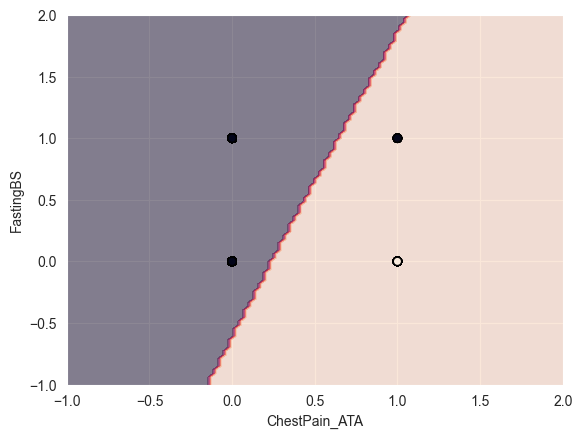

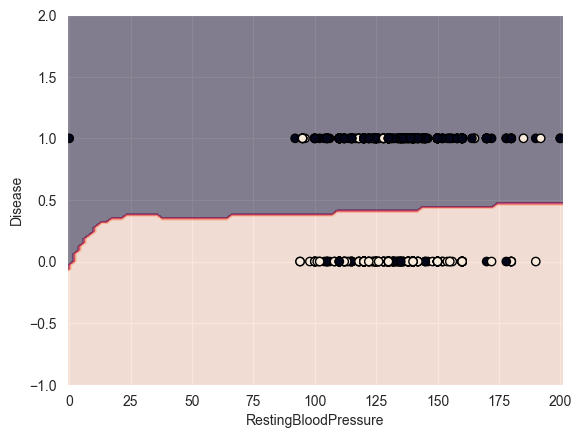

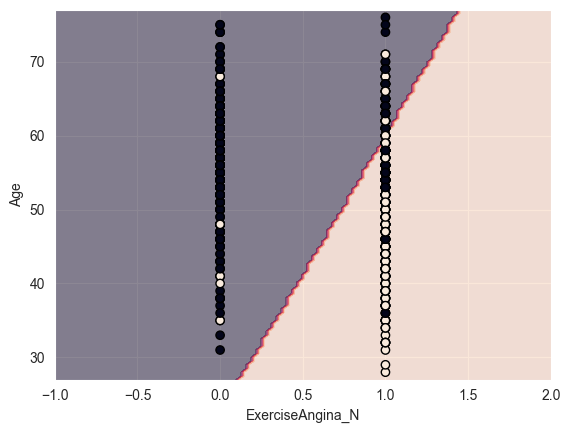

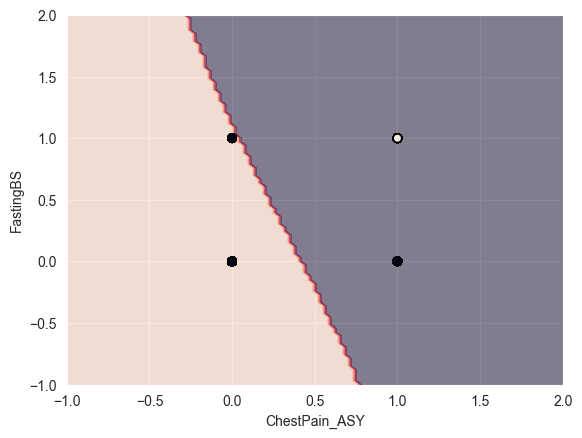

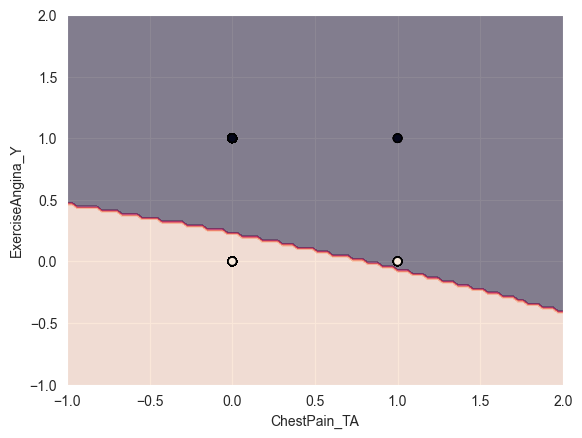

In [44]:
from sklearn.inspection import PartialDependenceDisplay, DecisionBoundaryDisplay


print(mlp.feature_names_in_)
for i in range(5):
    # Choosing two random features each time
    classifier = MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(20,), learning_rate='constant', solver='adam', max_iter=10000)
    xx = X_train[i].sample(n=2,axis='columns')
    yy = y_train[i]
    classifier.fit(xx, yy)
    disp = DecisionBoundaryDisplay.from_estimator(
    classifier, xx, response_method="predict",
    xlabel=xx.columns[0], ylabel=xx.columns[1],
    alpha=0.5)
    disp.ax_.scatter(xx.iloc[:, 0], xx.iloc[:, 1], c=yy,  edgecolor="k")

plt.show()


Another way:
know we use sklearn.inspection.PartialDependenceDisplay.


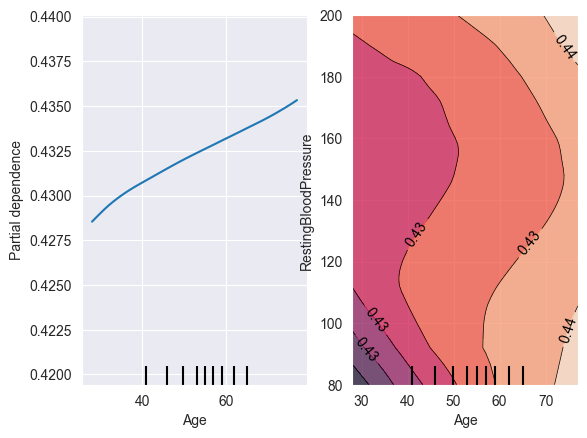

In [46]:
mlp = MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(20,), learning_rate='constant', solver='adam', max_iter=10000).fit(X_train[0], y_train[0])
PartialDependenceDisplay.from_estimator(mlp, X_train[0], [0, (0, 1)])
plt.show()

### Examining the effect of features
In this part, we train our model each time with just one feature and compute the accuracy for each of them and find the feature with maximum accuracy.

In [32]:
Accuracy_features= []
# print prediction results
n_features = X_train[0].shape[1]


for j in range(n-1):
    Accuracy_test = 0
    classifier = MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(20,), learning_rate='constant',solver='adam', max_iter=10000)
    for i in range(5):
        classifier.fit(X_train[i].iloc[:, j].values.reshape(-1, 1),y_train[i])
        y_pred = classifier.predict(X_test[i].iloc[:, j].values.reshape(-1, 1))
        Accuracy_test += accuracy_score(y_test[i], y_pred)*100
    Accuracy_features.append(Accuracy_test/5)
    print("feature name : ", X_train[0].columns[j])
    print(Accuracy_features[j])


max_accuracy = max(Accuracy_features)



feature name :  Age
62.83950617283951
feature name :  RestingBloodPressure
56.666666666666664
feature name :  Cholesterol
56.29629629629629
feature name :  FastingBS
56.79012345679011
feature name :  MaxHR
63.95061728395061
feature name :  Oldpeak
74.69135802469137
feature name :  Disease
80.37037037037037
feature name :  ChestPain_ASY
68.27160493827161
feature name :  ChestPain_ATA
66.79012345679014
feature name :  ChestPain_NAP
57.654320987654316
feature name :  ChestPain_TA
56.79012345679011
feature name :  Sex_F
57.28395061728395
feature name :  Sex_M
57.28395061728395
feature name :  RestingECG_LVH
56.79012345679011
feature name :  RestingECG_Normal
56.79012345679011
feature name :  RestingECG_ST
56.79012345679011
feature name :  ExerciseAngina_N
69.50617283950618
feature name :  ExerciseAngina_Y
69.50617283950618
feature name :  ST_Slope_Down
56.79012345679011
feature name :  ST_Slope_Flat
94.32098765432099


So, for each feature we have :
1 feature name :  Age
62.83950617283951
2 feature name :  RestingBloodPressure
56.666666666666664
3 feature name :  Cholesterol
56.29629629629629
4 feature name :  FastingBS
56.79012345679011
5 feature name :  MaxHR
63.95061728395061
6 feature name :  Oldpeak
74.69135802469137
7 feature name :  Disease
80.37037037037037
8 feature name :  ChestPain_ASY
68.27160493827161
9 feature name :  ChestPain_ATA
66.79012345679014
10 feature name :  ChestPain_NAP
57.654320987654316
11 feature name :  ChestPain_TA
56.79012345679011
12 feature name :  Sex_F
57.28395061728395
13 feature name :  Sex_M
57.28395061728395
14 feature name :  RestingECG_LVH
56.79012345679011
15 feature name :  RestingECG_Normal
56.79012345679011
16 feature name :  RestingECG_ST
56.79012345679011
17 feature name :  ExerciseAngina_N
69.50617283950618
18 feature name :  ExerciseAngina_Y
69.50617283950618
19 feature name :  ST_Slope_Down
56.79012345679011
20 feature name :  ST_Slope_Flat
94.32098765432099

In [34]:
print("max accuracy : ", max_accuracy)
index = Accuracy_features.index(max_accuracy)

print("feature with max accuracy : ",X_train[0].columns[index])

max accuracy :  94.32098765432099
feature with max accuracy :  ST_Slope_Flat


Form the result we see that the features with max accuracy are :
1 ST_Slope_Flat with accuracy 94.32
2 Disease with accuracy 80.37
3 Oldpeak with accuracy 74.69

### feature importance
In this section, we will evaluate the Feature importance with a forest of trees.
help : https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#feature-importances-with-a-forest-of-trees

In [35]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X_train[0].shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train[0], y_train[0])

RandomForestClassifier(random_state=0)

Feature importance based on mean decrease in impurity:
Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

In [39]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.014 seconds


The computation for full permutation importance is more costly. Features are shuffled n times and the model refitted to estimate the importance of it.

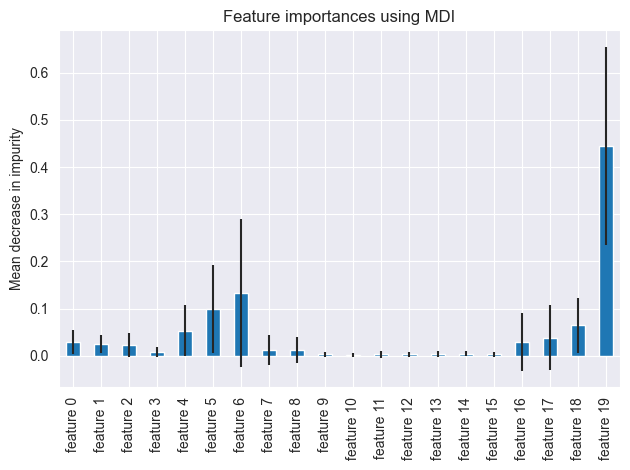

In [40]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

from the result we see that the feature 19 which is ST_Slope_Flat is the best feature.

Feature importance based on feature permutation:
Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.


In [42]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test[0], y_test[0], n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 3.823 seconds


The computation for full permutation importance is more costly. Features are shuffled n times and the model refitted to estimate the importance of it.

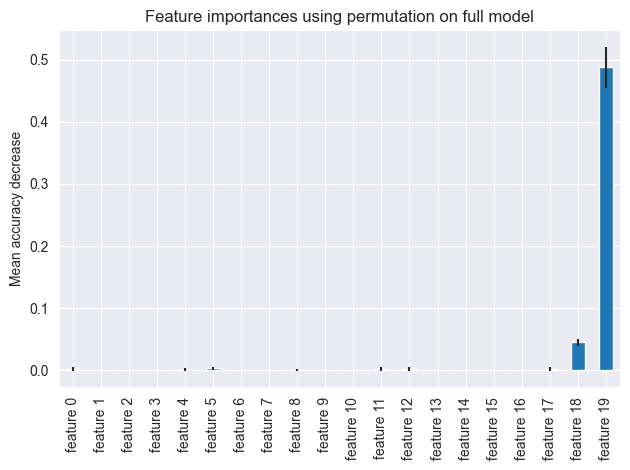

In [43]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()